In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [35]:
import os.path
from pathlib import Path

import scmdata
import json
import pyam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
from scipy.stats import norm

import utils
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

In [3]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

# Fossil and AFOLU-CO2 emissions

In [14]:
SOURCE_DATA = str(utils.DATA_DIR / "plotting_data" / "figure1" / f"{ID}.csv")
wg3_emissions = scmdata.ScmRun(SOURCE_DATA, lowercase_cols=True)

<IPython.core.display.Javascript object>

/Users/baur/opt/anaconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: UserWarning: 
The palette list has fewer values (1) than needed (355) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plt_df, **kwargs)


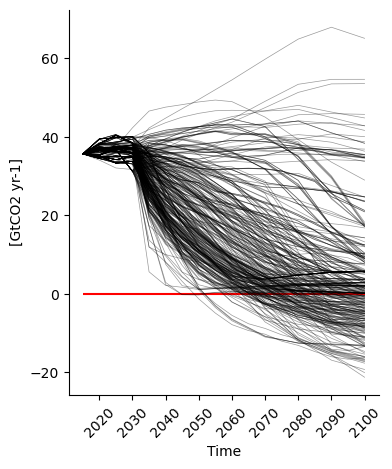

/Users/baur/opt/anaconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: UserWarning: 
The palette list has fewer values (1) than needed (355) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plt_df, **kwargs)


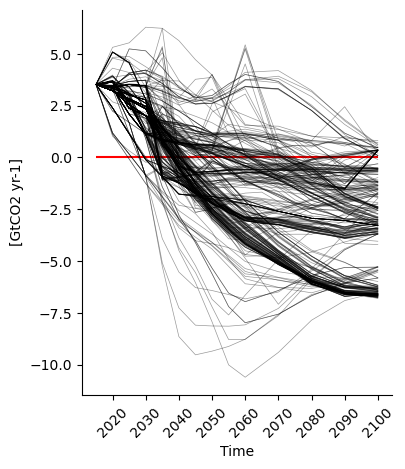

<IPython.core.display.Javascript object>

In [16]:
def plot(var, name):
    fig, ax = plt.subplots(figsize=(4, 5), frameon=False)

    plt.hlines(0, np.datetime64("2015-01-01"), np.datetime64("2100-01-01"), color="r")
    wg3_emissions.filter(variable=var).lineplot(
        hue="ms", legend=False, palette=["black"], linewidth=0.5, alpha=0.4
    )
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.xticks(rotation=45)
    plt.ylabel("[GtCO2 yr-1]")
    plt.xlabel("Time")
    # plt.grid(True)
    plt.savefig(
        str(Path(utils.PLOTS_DIR / "figure1" / f"{ID}_emissions_{name}.png")),
        bbox_inches="tight",
    )
    plt.show()


plot("*Energy*", "fossil")
plot("*AFOLU*", "AFOLU")

# Temperature trajectory

In [17]:
data = pd.read_csv(
    str(Path(utils.DATA_DIR / "interim" / "delta_rf" / f"{ID}_delta-erf.csv"))
)

<IPython.core.display.Javascript object>

In [18]:
# set negative temperature values = 0 (to not go below 1.5°C)
data.loc[:, "2020-01-01 00:00:00":"2500-01-01 00:00:00"].clip(lower=0, inplace=True)

<IPython.core.display.Javascript object>

In [19]:
data_sel = data[data["variable"] == "Surface Air Temperature Change"].reset_index(
    drop=True
)

<IPython.core.display.Javascript object>

In [20]:
time_covered = range(2015, 2500 + 1)

<IPython.core.display.Javascript object>

### 5th and 95th percentile over all members and all scenarios

In [25]:
low_quant_path = data_sel.groupby("variable").quantile(q=0.05).iloc[:, 277:].T[10:]
low_quant_path["time"] = time_covered
high_quant_path = data_sel.groupby("variable").quantile(q=0.95).iloc[:, 277:].T[10:]
high_quant_path["time"] = time_covered

<IPython.core.display.Javascript object>

### selecting an exemplary pathway

In [28]:
search_path = data_sel.groupby("ms").median()
search_path[(search_path["2100_warming"] < 2.3)&(search_path['peak_warming']>1.9)&(search_path['average_cdr_between_net0_and_15']> 20000)].iloc[:, 10:30]


,cumulative_emms_peak_warming_to_15,cumulative_pos_emms_at_15,cumulative_pos_emms_at_net0,ensemble_member,max_assigned_CDR,max_deployed_CDR,net-zero_year,net_CDR_at_15_temp,peak_warming,run_id,total_CDR,year_return_back_below_15_temp,1750-01-01 00:00:00,1751-01-01 00:00:00,1752-01-01 00:00:00,1753-01-01 00:00:00,1754-01-01 00:00:00,1755-01-01 00:00:00,1756-01-01 00:00:00,1757-01-01 00:00:00
ms,,,,,,,,,,,,,,,,,,,,
MESSAGEix-GLOBIOM_1.1EN_INDCi2030_1800f_NDCp,-2.426756e+06,1.233125e+06,1.233125e+06,299.5,-13945.048355,-36130.361986,2087.0,-2.474787e+06,2.236562,18899.5,-5.854744e+06,2178.5,0.0,0.022472,0.031478,0.036948,0.039232,0.041273,0.036365,0.021569
MESSAGEix-GLOBIOM_1.1EN_INDCi2030_2000_COV,-2.253250e+06,1.412070e+06,1.412070e+06,299.5,-16591.714483,-23479.091512,2098.0,-2.300308e+06,2.276765,20099.5,-6.757109e+06,2205.0,0.0,0.022472,0.031478,0.036948,0.039232,0.041273,0.036365,0.021569
POLES ENGAGEEN_INDCi2030_1600,-2.980191e+06,1.210337e+06,1.210337e+06,299.5,-13354.194626,-29011.297473,2102.0,-3.028114e+06,2.267354,11099.5,-5.197295e+06,2230.0,0.0,0.022472,0.031478,0.036948,0.039232,0.041273,0.036365,0.021569
REMIND 1.6EMF30_Slower-to-faster,-2.505777e+06,7.245129e+05,7.245129e+05,299.5,-5977.678295,-24519.561498,2074.0,-2.690107e+06,1.967211,9299.5,-2.786209e+06,2200.5,0.0,0.022472,0.031478,0.036948,0.039232,0.041273,0.036365,0.021569


<IPython.core.display.Javascript object>

In [30]:
ex_pathway = data_sel[
    (data_sel["ms"] == "MESSAGEix-GLOBIOM_1.1EN_INDCi2030_1800f_NDCp")
]
# MESSAGEix-GLOBIOM_1.1EN_INDCi2030_1800f_NDCp
# REMIND-MAgPIE 2.1-4.2EN_INDCi2030_2500
# WITCH 5.0EN_INDCi2030_2500_NDCp

<IPython.core.display.Javascript object>

In [33]:
ex_pathway_median = ex_pathway.groupby("variable").median().iloc[:, 277:].T[10:]
ex_pathway_median["time"] = time_covered

low_quant_ex = ex_pathway.groupby("variable").quantile(q=0.05).iloc[:, 277:].T[10:]
low_quant_ex["time"] = time_covered
high_quant_ex = ex_pathway.groupby("variable").quantile(q=0.95).iloc[:, 277:].T[10:]
high_quant_ex["time"] = time_covered

<IPython.core.display.Javascript object>

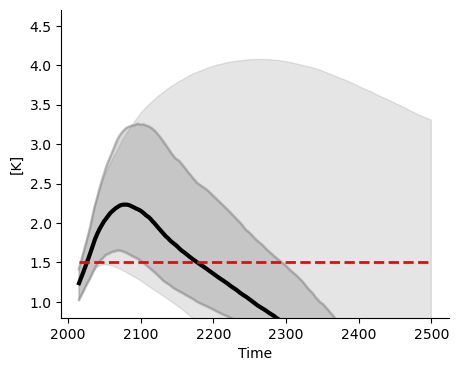

<IPython.core.display.Javascript object>

In [36]:
# Temperature pathways of
fig, ax = plt.subplots(figsize=(5, 4), frameon=False)

sns.lineplot(
    data=ex_pathway_median,
    x="time",
    y="Surface Air Temperature Change",
    color="black",
    alpha=1,
    lw=3,
)
sns.lineplot(
    data=low_quant_ex,
    x="time",
    y="Surface Air Temperature Change",
    color="gray",
    alpha=0.4,
    lw=2,
)
sns.lineplot(
    data=high_quant_ex,
    x="time",
    y="Surface Air Temperature Change",
    color="gray",
    alpha=0.4,
    lw=2,
)
ax.fill_between(
    low_quant_ex["time"],
    low_quant_ex["Surface Air Temperature Change"],
    high_quant_ex["Surface Air Temperature Change"],
    alpha=0.3,
    color="grey",
)

ax.fill_between(
    low_quant_path["time"],
    low_quant_path["Surface Air Temperature Change"],
    high_quant_path["Surface Air Temperature Change"],
    alpha=0.2,
    color="grey",
)


ax.hlines(1.5, 2015, 2500, color="red", ls="--", lw=2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim(0.8, None)
plt.ylabel("[K]")
# plt.ylabel("Surface Air Temperature Change [K]")
plt.xlabel("Time")

plt.savefig(
    str(Path(utils.PLOTS_DIR / "figure1" / f"{ID}_temp_trajectory.png")),
    bbox_inches="tight",
)
plt.show()

# Distribution for max yearly fossil-CO2

In [37]:
# make result reproducible
np.random.seed(1)
# lognormal distribution, s=stddev, scale=mean
lognorm_fossil_all = lognorm.rvs(s=0.8, scale=15, size=2000)
# select only values < 40
lognorm_fossil = [x for x in lognorm_fossil_all if x <= 40]

<IPython.core.display.Javascript object>

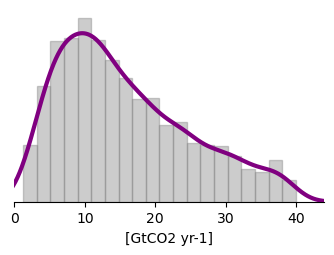

<IPython.core.display.Javascript object>

In [38]:
dist_fossil = pd.Series(lognorm_fossil)

fig, ax = plt.subplots(figsize=(4, 2.5))
dist_fossil.plot(
    kind="hist", density=True, edgecolor="gray", bins=20, color="gray", alpha=0.4
)  # change density to true, because KDE uses density
dist_fossil.plot(kind="kde", color="purple", lw=3)
ax.set_xlim(0, 44)
ax.set_xlabel("[GtCO2 yr-1]")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_ylabel("")

plt.savefig(
    str(Path(utils.PLOTS_DIR / "figure1" / f"{ID}_distribution_fossil.png")),
    bbox_inches="tight",
)
plt.show()

# Distribution for AFOLU floor

In [39]:
# make result reproducible
np.random.seed(1)
# lognormal distribution, scale=stddev, loc=mean
norm_AFOLU_all = norm.rvs(scale=0.5, size=2000)
# select only values -1 - 1
norm_AFOLU = [x for x in norm_AFOLU_all if (x > -1) and (x < 1)]
dist_AFOLU = pd.Series(norm_AFOLU)

<IPython.core.display.Javascript object>

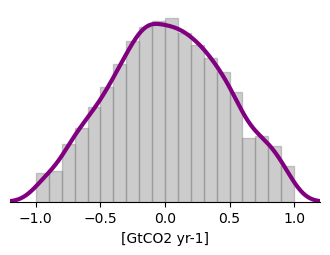

<IPython.core.display.Javascript object>

In [40]:
fig, ax = plt.subplots(figsize=(4, 2.5))
dist_AFOLU.plot(
    kind="hist", density=True, edgecolor="gray", bins=20, color="gray", alpha=0.4
)  # change density to true, because KDE uses density
dist_AFOLU.plot(kind="kde", color="purple", lw=3)
ax.set_xlim(-1.2, 1.2)
# ax.set_xlabel("net-negative emissions (GtCO2yr-1)")
ax.set_xlabel("[GtCO2 yr-1]")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_ylabel("")

plt.savefig(
    str(Path(utils.PLOTS_DIR / "figure1" / f"{ID}_distribution_AFOLU.png")),
    bbox_inches="tight",
)
plt.show()